<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1608768000&v=beta&t=2xuCh9kIGEeB_dLvnbLm9tAOzMU3dAvyssm5tbazr7c" width="1000"></center>

# SDC Certified Program in Python for Data Science

## Tema 5. Naive Bayes

### Prof. Manuel Sigüeñas, M.Sc.(c) 

[Perfil](https://socialdata-peru.com/learning/teacher2.php)

### Prof. Lenguajes de Programación para Ciencia de Datos / Agile Data Scientists / SCRUMStudy Certified Trainer


[msiguenas@socialdata-peru.com](msiguenas@socialdata-peru.com)

In [1]:
from IPython.display import Image
%matplotlib inline

<a id='beginning'></a>

1. [Clasificadores Navie Bayes](#part1)<br>

    a. [Construcción de un clasificador Bayesiano](#part2)<br>
    b. [Terminología](#part3)<br>
    c. [Cálculo de la probabilidad a Posteriori](#part4)<br>
    d. [Estimador de un Clasificador Bayesiano ](#part5)<br>
    e. [Estimador Naive Bayes I](#part6)<br>
    f. [Cálculo de las probabilidades condicionales.](#part7)<br>
    g. [Predicción](#part8)<br>
    h. [Comentarios Finales](#part9)
    <br>

<a id='part1'></a>
# Clasificadores Navie Bayes

- Los clasificadores Bayesianos buscan responder a la pregunta: "basados en los valores observados de los predictores, ¿Cuál es la probabilidad de que el resultados sea la clase $C_K$?.
<br>

- Se encuentra basado en el teorema de Bayes-Price.
<br>

- Estudios comparativos de diversos algoritmos de clasificación han encontrado que Naive Bayes es comparable en perfirmance a los árboles de decisión y las redes neuronales.
<br>

- Suelen tener alta precisión y rapidez cuando son aplicados a grandes bases de datos.
<br>

- Una asunción importante es que el efecto del valor de un atributo para una clase dada es independiente de los valores del resto de los atributos (Independencia Condicional dentro de clases).
<br>

- El supuesto anterior simplifica los cálculos, por eso recibe el nombre de $Naive$.

<a id='part2'></a>
## Construcción de un clasificador Bayesiano

- Asumir que se quiere predecir la variable $Y$ que asume $K$ valores distintos y que estos valores son 1, ..., $K$.
<br>

- Asumir que hay $m$ variables predictoras $X = (X_1, ..., X_m)$.
<br>

- Dividir el conjunto de datos en $K$ subconjunto de datos llamados $DS_1, DS_2, ..., DS_K$.
<br>

- Definir $DS_k =$ Registros en los cuales $Y = k$.
<br>

- Para cada grupo $DS_k$, usamos estimación de densidad para estimar el modelo $M_k$ que modela la distribución de las variables de entrada entre los registros $Y=k$.
<br>

- $M_K$ estima la función de probabilidad conjunta por clase $Pr[X|Y = k]$.

- **Idea 1 (No Bayesiana):** Suponga que se quiere predecir la clase $Y$ a la cual pertenecen el vector $(X_1 =x_1, X_2=x_2,....X_m=x_m)$. Se puede tomar como la clase $Y=k$ a aquella para la cual $ Pr[Y = k|X]$ sea la mayor posible. Esto es, 
<br>

$$Y^{predict} = \text{arg más} Pr[X_1=x_1,... X_m=x_m|Y=K]$$

<br>

- **Idea 2 (Bayesiana):** Para predecir a cual pertenece el nuevo vector de entradas $(X_1 = x_1, X_2=x_2,... X_m= x_m)$ es mejor hallar la clase $Y=k$ para la cual la probabilidad posterior $Pr[Y =k|X]$ sea la mayor posible.

<a id='part3'></a>
## Terminología

- **MLE (Estimador Máximo Verosimil):**
<br>

$$ Y^{predict} = \text{arg máx} Pr[X_1=x_1, ...X_m=x_m|Y=k]$$
<br>

- **MAP (Estimador Máximo a Posteriori):**
<br>

$$Y^{predict} = \text{arg máx} Pr[Y=k|X_1 = x_1, ... X_m =x_m]$$

<a id='part4'></a>
## Cálculo de la probabilidad a Posteriori

Sea $Y$ la variable de clasificación que puede tomar los valores $K=1, ..., K$ y $K$ la colección de variables predictoras. La probabilidad de pertenecer a una clase $k$ para un conjunto de valores de $X$ (evidencia) estará dada por la Regla de Bayes-Price:
<br>

$$Pr[Y=k|X] = \frac{Pr[Y=k]Pr[X|Y=k]}{Pr[X]}$$
<br>

$$\text{     }=\frac{Pr[Y=k]Pr[X_1=x_1,, ...X_m=x_m|Y=K}{Pr[X_1=x_1,... X_m=x_m]}$$
<br>

$$=\frac{Pr[Y=k]Pr[X_1=x_1,, ...X_m=x_m|Y=K}{\Sigma^{K}_{j=1}Pr[X_1=x_1,... X_m=x_m, Y=K]}$$
<br>

$$=\frac{Pr[Y=k]Pr[X_1=x_1,, ...X_m=x_m|Y=K}{\Sigma^{K}_{j=1}Pr[Y=j]Pr[X_1=x_1,... X_m=x_m, Y=j]}$$


- $Pr[Y=k|X]$ **es la probabilidad a posteriori**. Por ejemplo supongamos que tenemos las variables predictoras referidas a clientes descritos por los atributos edad e ingreso. Y de manera específica, un cliente tiene 35 años de edad con un ingreso de $\text{\$.40000}$. Supongamos que $k$ es la hipótesis de que el cliente comprará una computadora. Entonces se desea calcular la probabilidad de que el cliente compe una computadora conociendo su edad e ingreso.
<br>

- $Pr[Y=k]$ es la probabilidad a priori del resultado. Esencialmente, basado en lo que conocemos acerca del problema, cuánto esperaríamos que sea la probabilidad de pertenecer a una clase. Para ele ejemplo anterior, sería la probabilidad de que un cliente compre una computadora independientemente de su edad, ingreso o cualquier otra información.

- $Pr[X]$ es la probabilidad de los valores predictores. En otras palabras, si una nueva muestra será predicha, ¿Qué tan probable es este patrón en comparación con el resto de datos de entrenamiento?. Formalmente, esta probabilidad es calculada usando una distribución de probabilidad multivariada ¿. En la práctica, se realizan asuncionews para reducir la complejidad de este cálculo. Para nuestro ejemplo, será la probabilidad de que un cliente tenga 35 años y gane $\text{\$40000}$.
<br>

- $Pr[X|Y=k]$ Es la probabilidad condicional. Para los datos asociados con la clase k, ¿Cuál es la probabilidad de observar los valores para las variables predictoras ?. En el ejemplo, cuál es la probabilidad de que un cliente tenga 35 años y gane $\text{\$40000}$ si sabemos que comprará una computadora.

<a id='part5'></a>
## Estimador de un Clasificador Bayesiano 

- Estimar la distribución de las predictoras en cada clase. Es decir, estimar $Pr[X_1=x_1, .. X_m=x_m|Y=k]$. Opciones.
<br>

 - Estimador de densidad conjunta (kernel, k-nn)
 - Estimador de densidad Naïve
<br>

- Estimar $Pr[Y=k]$ como la fracción de registros en el cual $Y=k$.
<br>

- Para una nueva predicción.
<br>

$$ Y^{predict} = \text{arg máx} Pr[Y=k|X_1=x_1...X_m=x_m]$$
<br> 

$$ \text{arg máx} Pr[X_1=x_1, ... X_m =x_m|Y=k] Pr [Y=k]$$

<a id='part6'></a>
## Estimador Naive Bayes I

- El modelo Naïve Bayes simplifica el cálculo asumiendo que los predictores son independientes en cada una de las clases:
<br>

$$ Pr[X_1=x_1, ... X_m=x_m|Y=k] = Pr [X_1=x_1|Y=k]... Pr[X_m=x_m|Y]$$
<br>
    Luego,
<br>

$$ Y^{predict} = \text{arg máx} Pr[X_1=x_1, ... X_m=x_m|Y=k] Pr [Y=k]$$
<br>
    Se convierte en:

<br>

$$Y^{predict} = \text{arg máx} Pr[Y=k] \prod_{j=1}^m Pr[X_j= x_j|Y=k]$$
 

- Si hay muchos atributos de entrada este producto puede producir underflow, asi que es mejor usar logaritmos.
<br>

$$Y^{predict} = \text{arg máx} \left(log Pr[Y=k]+\sum^m_{j=1}log Pr[X_j=x_j|Y = k]\right)$$

<a id='part7'></a>
## Cálculo de las probabilidades condicionales.

- Si $X_j$ es discrte, la estimación sería la frecuencia relativa dentro de cada clase.
<br>

- El clasificador Naïve Bayes puede ser aplicado tambien cuando hay predictoras continuas. Alternativas:
<br>
 - a. Aplicar previamente un mpetodo de dicretización tal como: Intervalos de igual ancho, intervalos con igual frecuencia, $ChiMerge, 1R$ ,Discretización usando el método de la entropia.
 - b. Estimación no paramética de la densidad de Kernel (Hardle et al. 2004)
 - c. Asumiendo una distrubción para cada predictora, por lo general Gausiana, con media y varianza estiamada de los datos. La librería e1071 de R contiene una función $naïveBayes$ que calcula el clasificador naïve Bayes.
     <BR>En este caso:
<br>

$$ Pr[X_j = x_j|Y=k] = \frac{1}{s_j\sqrt{2\pi}} exp \left[\frac{-(x_i-\bar{x}_j)^2}{2s_{j^2}}\right]$$

- Donde $\bar{x}_j$ y $s_j$ son la media y varianza de los valores de la variable $X_j en la clase $k$.

<a id='part8'></a>
## Predicción

- Para predecir la clase a la cual pertenece $X,$ $Pr[Y=k] Pr[X|Y=k]$ es evaluado para cada clase $k$. El clasificador predecirá que los valores de $X$ pertenecen a la clase $i$ si y solo si:
<br>

$$ Pr[Y = i] Pr [X|Y=i] > Pr [Y=j] Pr [X|Y=j]$$

$$\text{para }   1\leq j \leq m , j \neq i$$

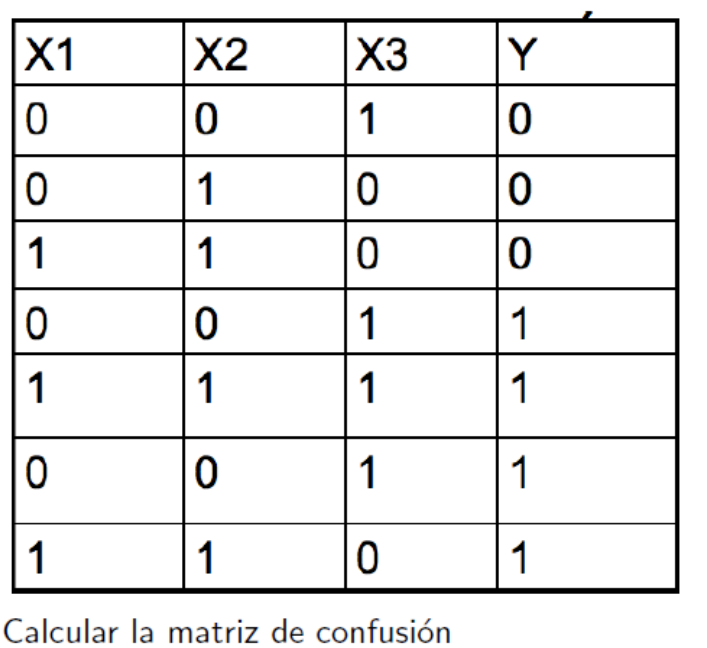

In [3]:
Image(filename='D:/Python/3. Nivel III/4/imagenes/imagen1.png', width=400) 

<a id='part9'></a>
## Comentarios Finales

- Las probabilidades cero afectan al clasificador Naïve Bayes. Una función de probabilidad a priori de Dirichlet es usada para resolver el problema.
<br>

- El proceso de discretización tambien parece afectar el rendimiento del clasificador.
<br>

- Naïve Bayes es bastante barato. No tiene problemas para trabajar con 10000 atributos.
<br>

- Naïve Bayes es un caso particular de Redes bayesianas.